In [1]:
from matplotlib.pyplot import figure
import networkx as nx
from matplotlib.pyplot import figure
import pandas as pd
import matplotlib.pyplot as plt
from csv import reader
import sys 
import numpy as np

In [7]:
df_cl = pd.read_csv(r'/Users/hernanadasme/Projects/data_challenges/notebooks /challenges_cleaned.csv')
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [17]:
df_cl.head(179)

,challenge_id,rec_Title,source,source_year,challenging_id,boxer_challenging,challenged_id,boxer_challenged,status,condition,basis,location_descp,city,location,weight
0,972,Araya v. Bolli,Semanario La Prensa. Los Andes,1928-04-05,882,"Araya, Manuel",780,"Bolli, Carlos",NaN,NaN,NaN,"Manager's business, downtown Los Andes.",Los Andes,POINT(-70.600875 -32.835752),1
1,975,Valdes v. Pérez,Semanario La Prensa. Los Andes,1928-04-08,833,"Valdes, Mario",272,"Pérez, Amador",NaN,NaN,NaN,NaN,Los Andes,POINT(-70.688871 -32.833203),2
2,978,Ortiz v. Araya,Semanario La Prensa. Los Andes,1928-04-08,976,"Ortiz, Rafael",882,"Araya, Manuel",NaN,NaN,NaN,NaN,Los Andes,POINT(-70.598582 -32.833016),2
3,985,Valdes v. Gallardo,Semanario La Prensa. Los Andes,1928-04-29,833,"Valdes, Mario",827,"Gallardo, Pedro",NaN,NaN,NaN,NaN,Los Andes,POINT(-70.593621 -32.834478),2
4,986,Silva v. Iñiguez,Los Sports,1924-02-01,189,"Silva, Carlos",987,"Iñiguez, Mario",accepted,NaN,NaN,NaN,Antofagasta,POINT(-70.397502 -23.650928),1
5,988,Flores v. Farrafino,Los Sports,1924-03-07,302,"Flores, Sara",303,"Farrafino, Cleme",NaN,NaN,NaN,NaN,Antofagasta,POINT(-70.397502 -23.650928),1
6,993,Huerta v. Giaverini,Los Sports,1924-02-01,891,"Huerta, Francisco",573,"Giaverini, Oscar",NaN,NaN,NaN,NaN,Antofagasta,POINT(-70.397502 -23.650928),2
7,994,Huerta v. Giaverini,Los Sports,1924-02-01,891,"Huerta, Francisco",573,"Giaverini, Oscar",NaN,NaN,NaN,NaN,Antofagasta,POINT(-70.397502 -23.650928),2
8,1000,Tapia v. Inostroza,Los Sports,1924-03-07,158,"Tapia, Julio",1001,"Inostroza, Ruperto",NaN,NaN,NaN,NaN,Antofagasta,POINT(-70.397502 -23.650928),1
9,1002,Alley v. Salinas,Los Sports,1924-03-07,1003,"Alley, Juan",321,"Salinas, Juan",accepted,NaN,NaN,NaN,NaN,NaN,1


In [ ]:
#option D which mixes the from_pandas_edgelist and the adding metadata with a loop
CH_di = nx.from_pandas_edgelist(df, 'challenging_id', 'challenged_id', edge_attr='weight')
CH.add_nodes_from(df['challenging_id'], bipartite = 'challenger')
CH.add_nodes_from(df['challenged_id'], bipartite = 'challenged')
for box, row in df.iterrows():
    CH.nodes[row['challenging_id']]['name'] = row['boxer_challenging']
    CH.nodes[row['challenged_id']]['name'] = row['boxer_challenged']
    CH.nodes[row['challenging_id']]['source'] = row['source']
    CH.nodes[row['challenging_id']]['date'] = row['source_year']
for r, d in df.iterrows():
    CH.add_edge(d['challenging_id'], d['challenged_id'], date = d['source_year'], challenge = d['rec_Title'])    
# Add the degree centrality score of each node to their metadata dictionary
dcs = nx.degree_centrality(CH)
for n in CH.nodes():
    CH.nodes[n]['centrality'] = dcs[n]
len(CH.nodes), len(CH.edges)

In [32]:
df_cl.loc[df_cl['source']=='El Mercurio de Valparaíso']

,challenge_id,rec_Title,source,source_year,challenging_id,boxer_challenging,challenged_id,boxer_challenged,status,condition,basis,location_descp,city,location,weight
162,1492,Stivens v. Valdes,El Mercurio de Valparaíso,1922-11-07,1489,"Stivens, Oscar",1490,"Valdes, Manuel",NaN,NaN,with manager A. Gazzolo,NaN,Valparaiso,POINT(-71.619675 -33.045846),1


In [39]:
df_cl.to_csv('challenges_cleaned_corrected.csv', index = False, encoding = 'utf-8-sig')

In [45]:
df_cl['source_year'].value_counts()

1925-03-20    7
1924-01-25    7
1924-03-07    6
1924-01-23    6
1927-07-23    6
1928-02-09    5
1921-11-23    5
1925-07-10    4
1928-04-08    4
1925-06-05    4
1925-01-23    4
1925-05-01    4
1924-04-15    4
1928-02-16    3
1923-09-28    3
1928-02-26    3
1922-03-20    3
1925-04-10    3
1924-03-14    3
1924-02-01    3
1928-02-17    3
1922-04-07    2
1922-07-29    2
1921-10-28    2
1922-08-01    2
1921-07-13    2
1921-01-08    2
1922-09-02    2
1922-11-07    2
1922-11-24    2
1922-12-15    2
1925-11-27    2
1925-08-14    2
1925-07-31    2
1928-04-05    2
1925-05-10    2
1927-01-07    2
1926-04-02    2
1924-05-23    2
1924-04-04    2
1927-05-20    2
1927-03-11    2
1928-02-10    2
1922-03-29    1
1928-05-06    1
1922-03-02    1
1922-01-03    1
1925-04-17    1
1922-04-27    1
1925-02-27    1
1925-02-20    1
1925-03-13    1
1928-12-07    1
1923-01-01    1
1921-11-18    1
1922-09-12    1
1922-10-05    1
1922-12-01    1
1928-04-29    1
1923-01-07    1
1923-01-12    1
1922-11-18    1
1925-12-

In [33]:
df_cl.iat[162,2] = 'El Mercurio de Valparaiso'

In [5]:
df_cl.loc[df_cl['city'] == 'Santago']

,challenge_id,rec_Title,source,source_year,challenging_id,boxer_challenging,challenged_id,boxer_challenged,status,condition,basis,location_descp,city,location,weight
96,1312,Ortega v. Muñoz,Los Sports,1925-08-14,244,"Ortega, Eliecer",1313,"Muñoz, Pablo",NaN,NaN,NaN,NaN,Santago,POINT(-70.65045 -33.437776),1


In [6]:
df_cl.iat[100,12]

'Valparaíso'

In [36]:
df_cl.iat[100,12] = 'Valparaiso'
df_cl.iat[126,12] = 'Valparaiso'
df_cl.iat[127,12] = 'Valparaiso'
df_cl.iat[128,12] = 'Valparaiso'
df_cl.iat[96,12] = 'Santiago'

In [14]:
df_cl.iat[107,2] = 'Semanario La Prensa. Los Andes'

In [ ]:
df_cl.iat[107,2] = 'Valparaiso'

In [8]:
A = nx.DiGraph()
A.add_nodes_from(df_cl['source'])
A.add_nodes_from(df_cl['rec_Title'])

In [9]:
for box, row in df_cl.iterrows():
    A.nodes[row['source']]['city'] = row['city']
    A.nodes[row['source']]['name'] = row['rec_Title']

In [10]:
for r, d in df_cl.iterrows():
    A.add_edge(d['source'], d['rec_Title'], date = d['source_year'], name = d['rec_Title'])

In [67]:
A.edges(data=True)

OutEdgeDataView([('Semanario La Prensa. Los Andes', 'Araya v. Bolli', {'date': '1928-04-05', 'name': 'Araya v. Bolli'}), ('Semanario La Prensa. Los Andes', 'Valdes v. Pérez', {'date': '1928-04-08', 'name': 'Valdes v. Pérez'}), ('Semanario La Prensa. Los Andes', 'Ortiz v. Araya', {'date': '1928-04-08', 'name': 'Ortiz v. Araya'}), ('Semanario La Prensa. Los Andes', 'Valdes v. Gallardo', {'date': '1928-01-01', 'name': 'Valdes v. Gallardo'}), ('Semanario La Prensa. Los Andes', 'Carvajal v. Baeza', {'date': '1927-12-04', 'name': 'Carvajal v. Baeza'}), ('Semanario La Prensa. Los Andes', 'Huerta v. Medalla', {'date': '1928-01-22', 'name': 'Huerta v. Medalla'}), ('Semanario La Prensa. Los Andes', 'Mac-Conell v. Rios', {'date': '1928-02-02', 'name': 'Mac-Conell v. Rios'}), ('Semanario La Prensa. Los Andes', 'Cifuentes v. Farias', {'date': '1928-02-09', 'name': 'Cifuentes v. Farias'}), ('Semanario La Prensa. Los Andes', 'Mac-Conell v. Carvajal', {'date': '1928-02-09', 'name': 'Mac-Conell v. Carv

In [71]:
A.nodes(data=True)

NodeDataView({'Semanario La Prensa. Los Andes': {'city': 'Los Andes', 'name': 'Valdes v. Gallardo'}, 'Los Sports': {'city': 'Santiago', 'name': 'Aguilera v. Moreno'}, 'Vicentini': {'city': 'Santiago', 'name': 'Salinas v. Lasseube'}, 'El Mercurio de Valparaiso': {'city': 'Valparaiso', 'name': 'Lopez v. Roca'}, 'La Prensa de Talagante': {'city': 'Talagante', 'name': 'Santilly v. García'}, 'La Nacion': {'city': 'Santiago', 'name': 'Cifuentes v. Alviña'}, 'El Teniente. Diario del Departamento de Bienestar': {'city': 'Sewell', 'name': 'Ruiz v. Alvarado'}, 'Araya v. Bolli': {}, 'Valdes v. Pérez': {}, 'Ortiz v. Araya': {}, 'Valdes v. Gallardo': {}, 'Silva v. Iñiguez': {}, 'Flores v. Farrafino': {}, 'Huerta v. Giaverini': {}, 'Tapia v. Inostroza': {}, 'Alley v. Salinas': {}, 'Olguín v. Valdenegro': {}, 'Olguín v. Henriquez': {}, 'Olguín v. Leiva': {}, 'Acosta v. Molina': {}, 'Acosta v. Parra': {}, 'Rios v. Arratia': {}, 'Caldera v. Anguita': {}, 'Caldera v. Giaverini': {}, 'Guerrero v. Lasseub

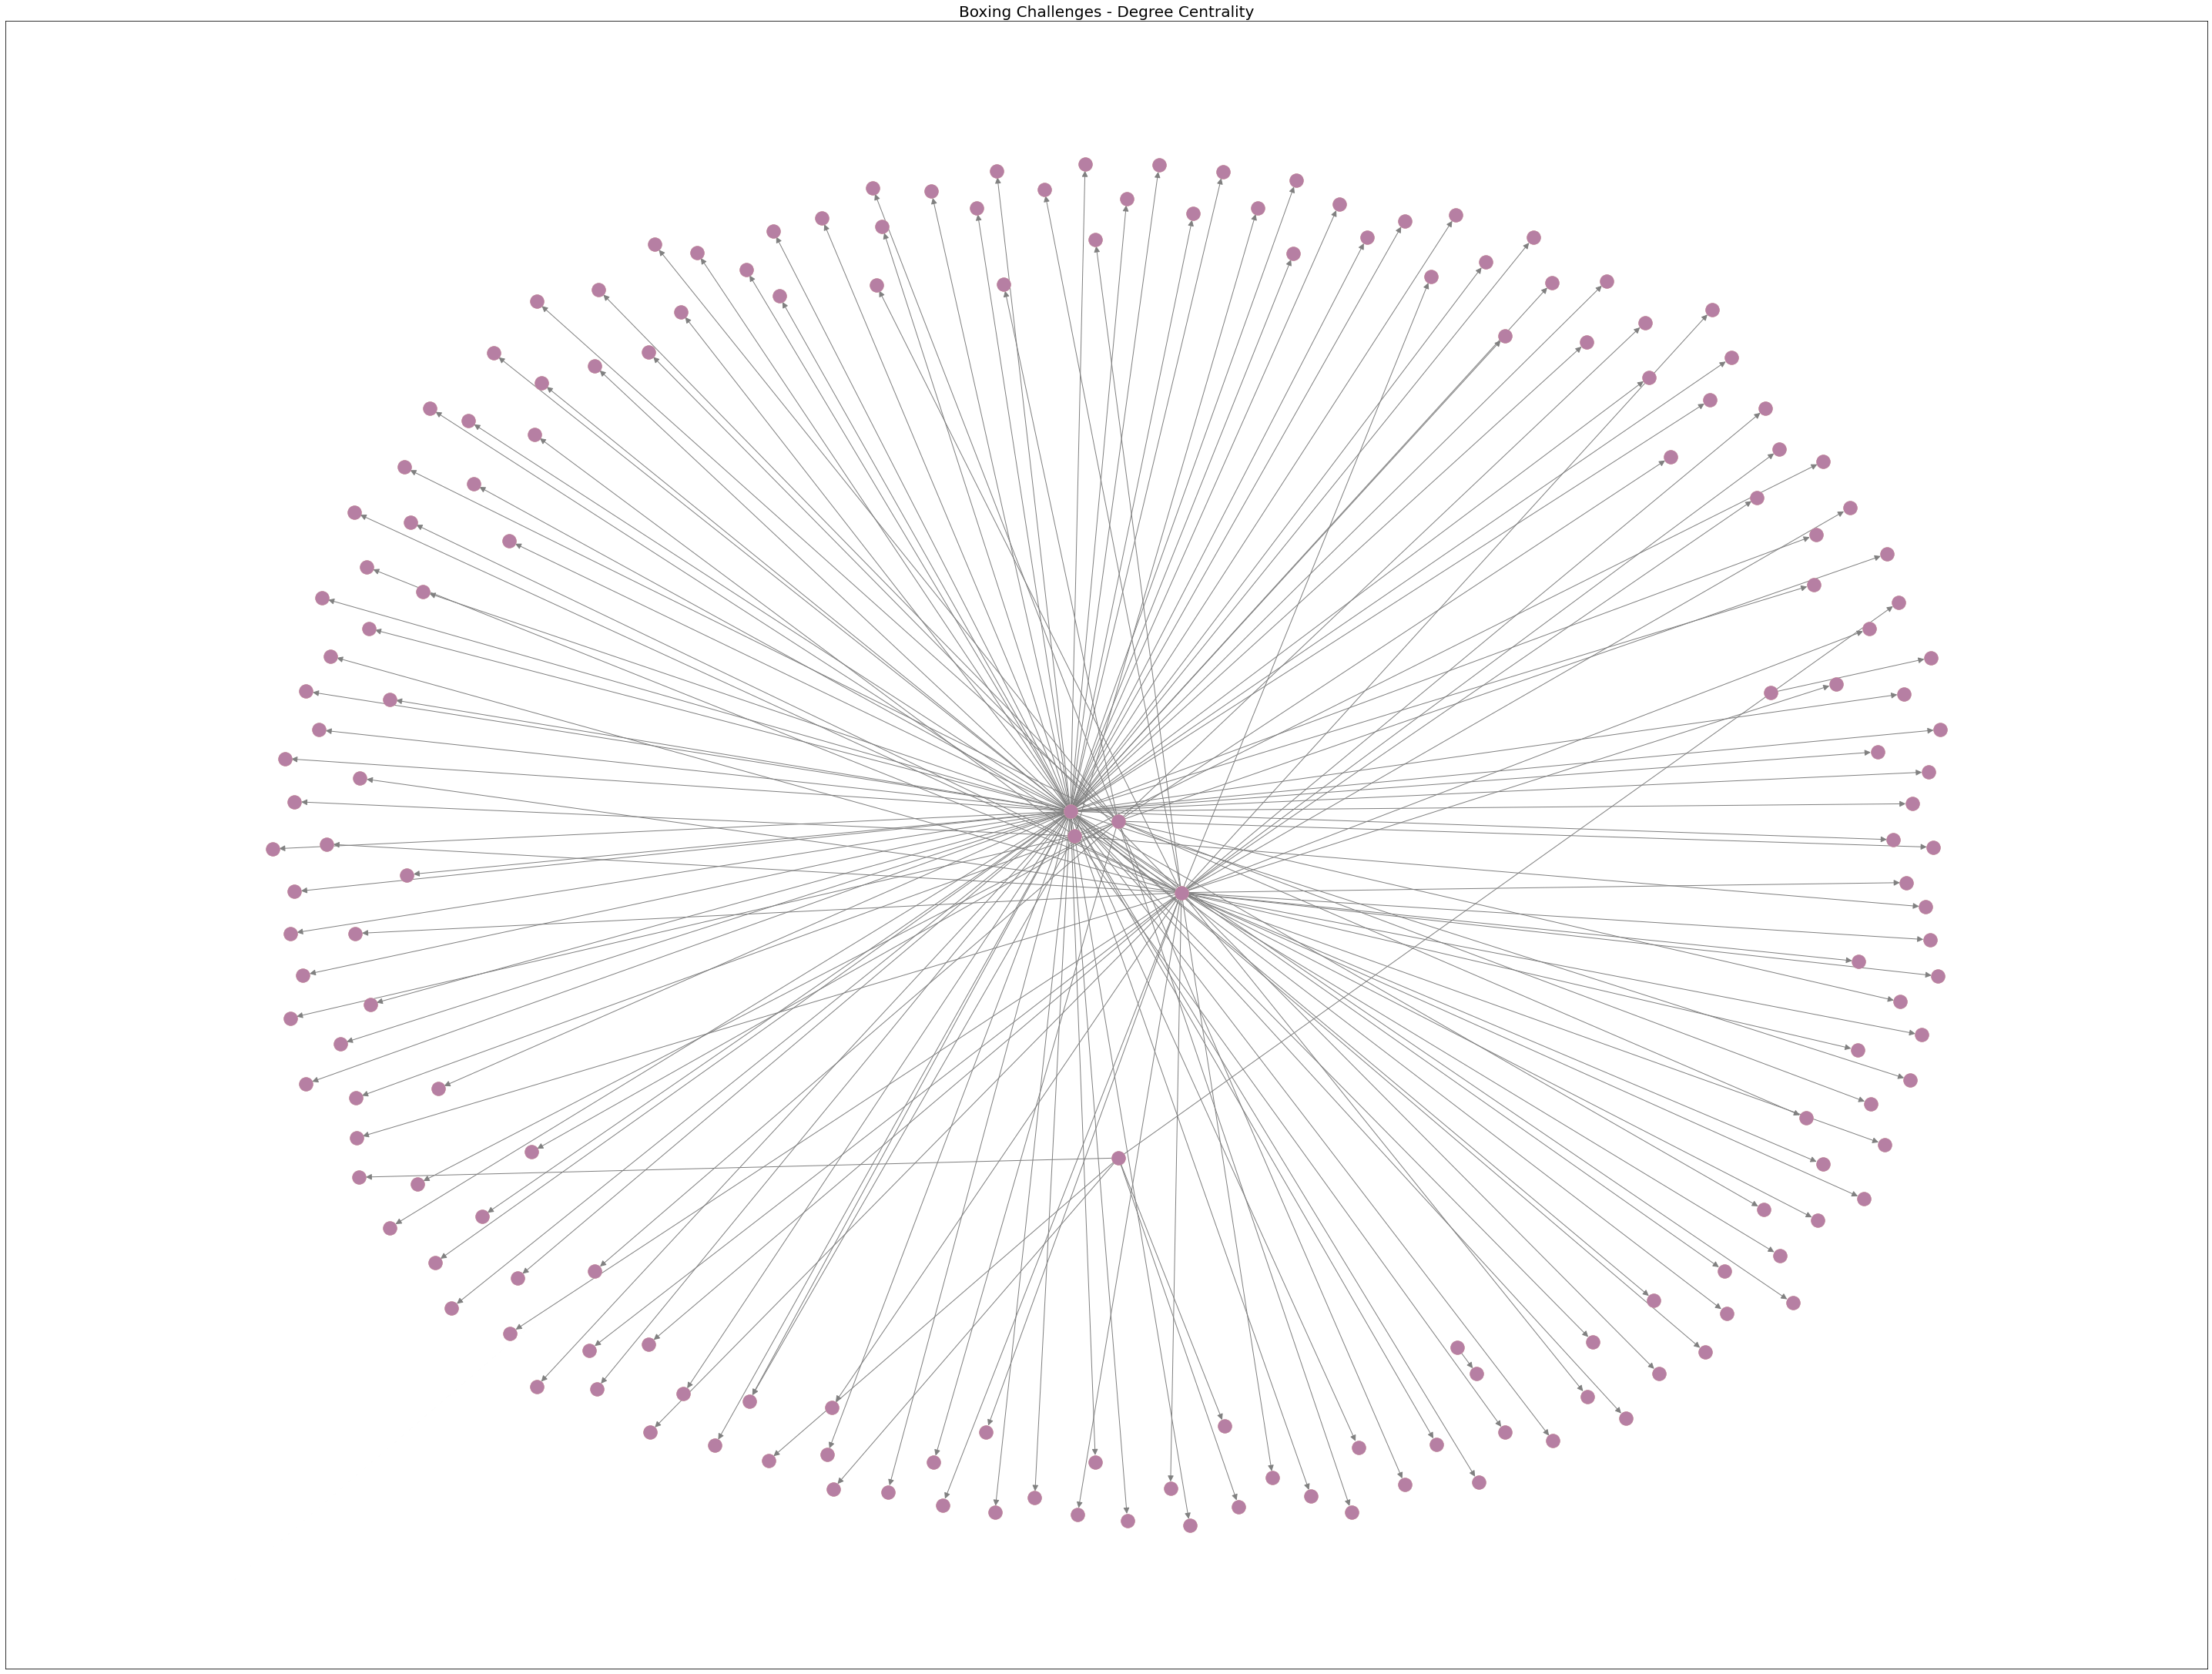

In [124]:
#option D which mixes the from_pandas_edgelist and the adding metadata with a loop
CCH = nx.from_pandas_edgelist(df_cl, 'source', 'boxer_challenging')
CCH.add_nodes_from(df_cl['source'], bipartite = 'press')
CCH.add_nodes_from(df_cl['boxer_challenging'], bipartite = 'challenger')
for r, d in df_cl.iterrows():
    CCH.nodes[row['source']]['city'] = row['city']
for r, d in df_cl.iterrows():
    CCH.add_edge(d['source'], d['boxer_challenging'], date = d['source_year'], city = d['city'])    
# Add the degree centrality score of each node to their metadata dictionary
#dcs = nx.degree_centrality(CCH)
#for n in CCH.nodes():
    #CCH.nodes[n]['centrality'] = dcs[n]
len(CCH.nodes), len(CCH.edges)

(138, 133)

In [129]:
sources = [node for node in CCH.nodes() if node in df_cl.source.unique()]
challenger = [node for node in CCH.nodes() if node in df_cl.boxer_challenging.unique()]
print(len(sources))
print(len(challenger))

7
131


In [126]:
# 2. Create a layout for our nodes 
pos = nx.nx_agraph.graphviz_layout(CCH, prog="twopi")

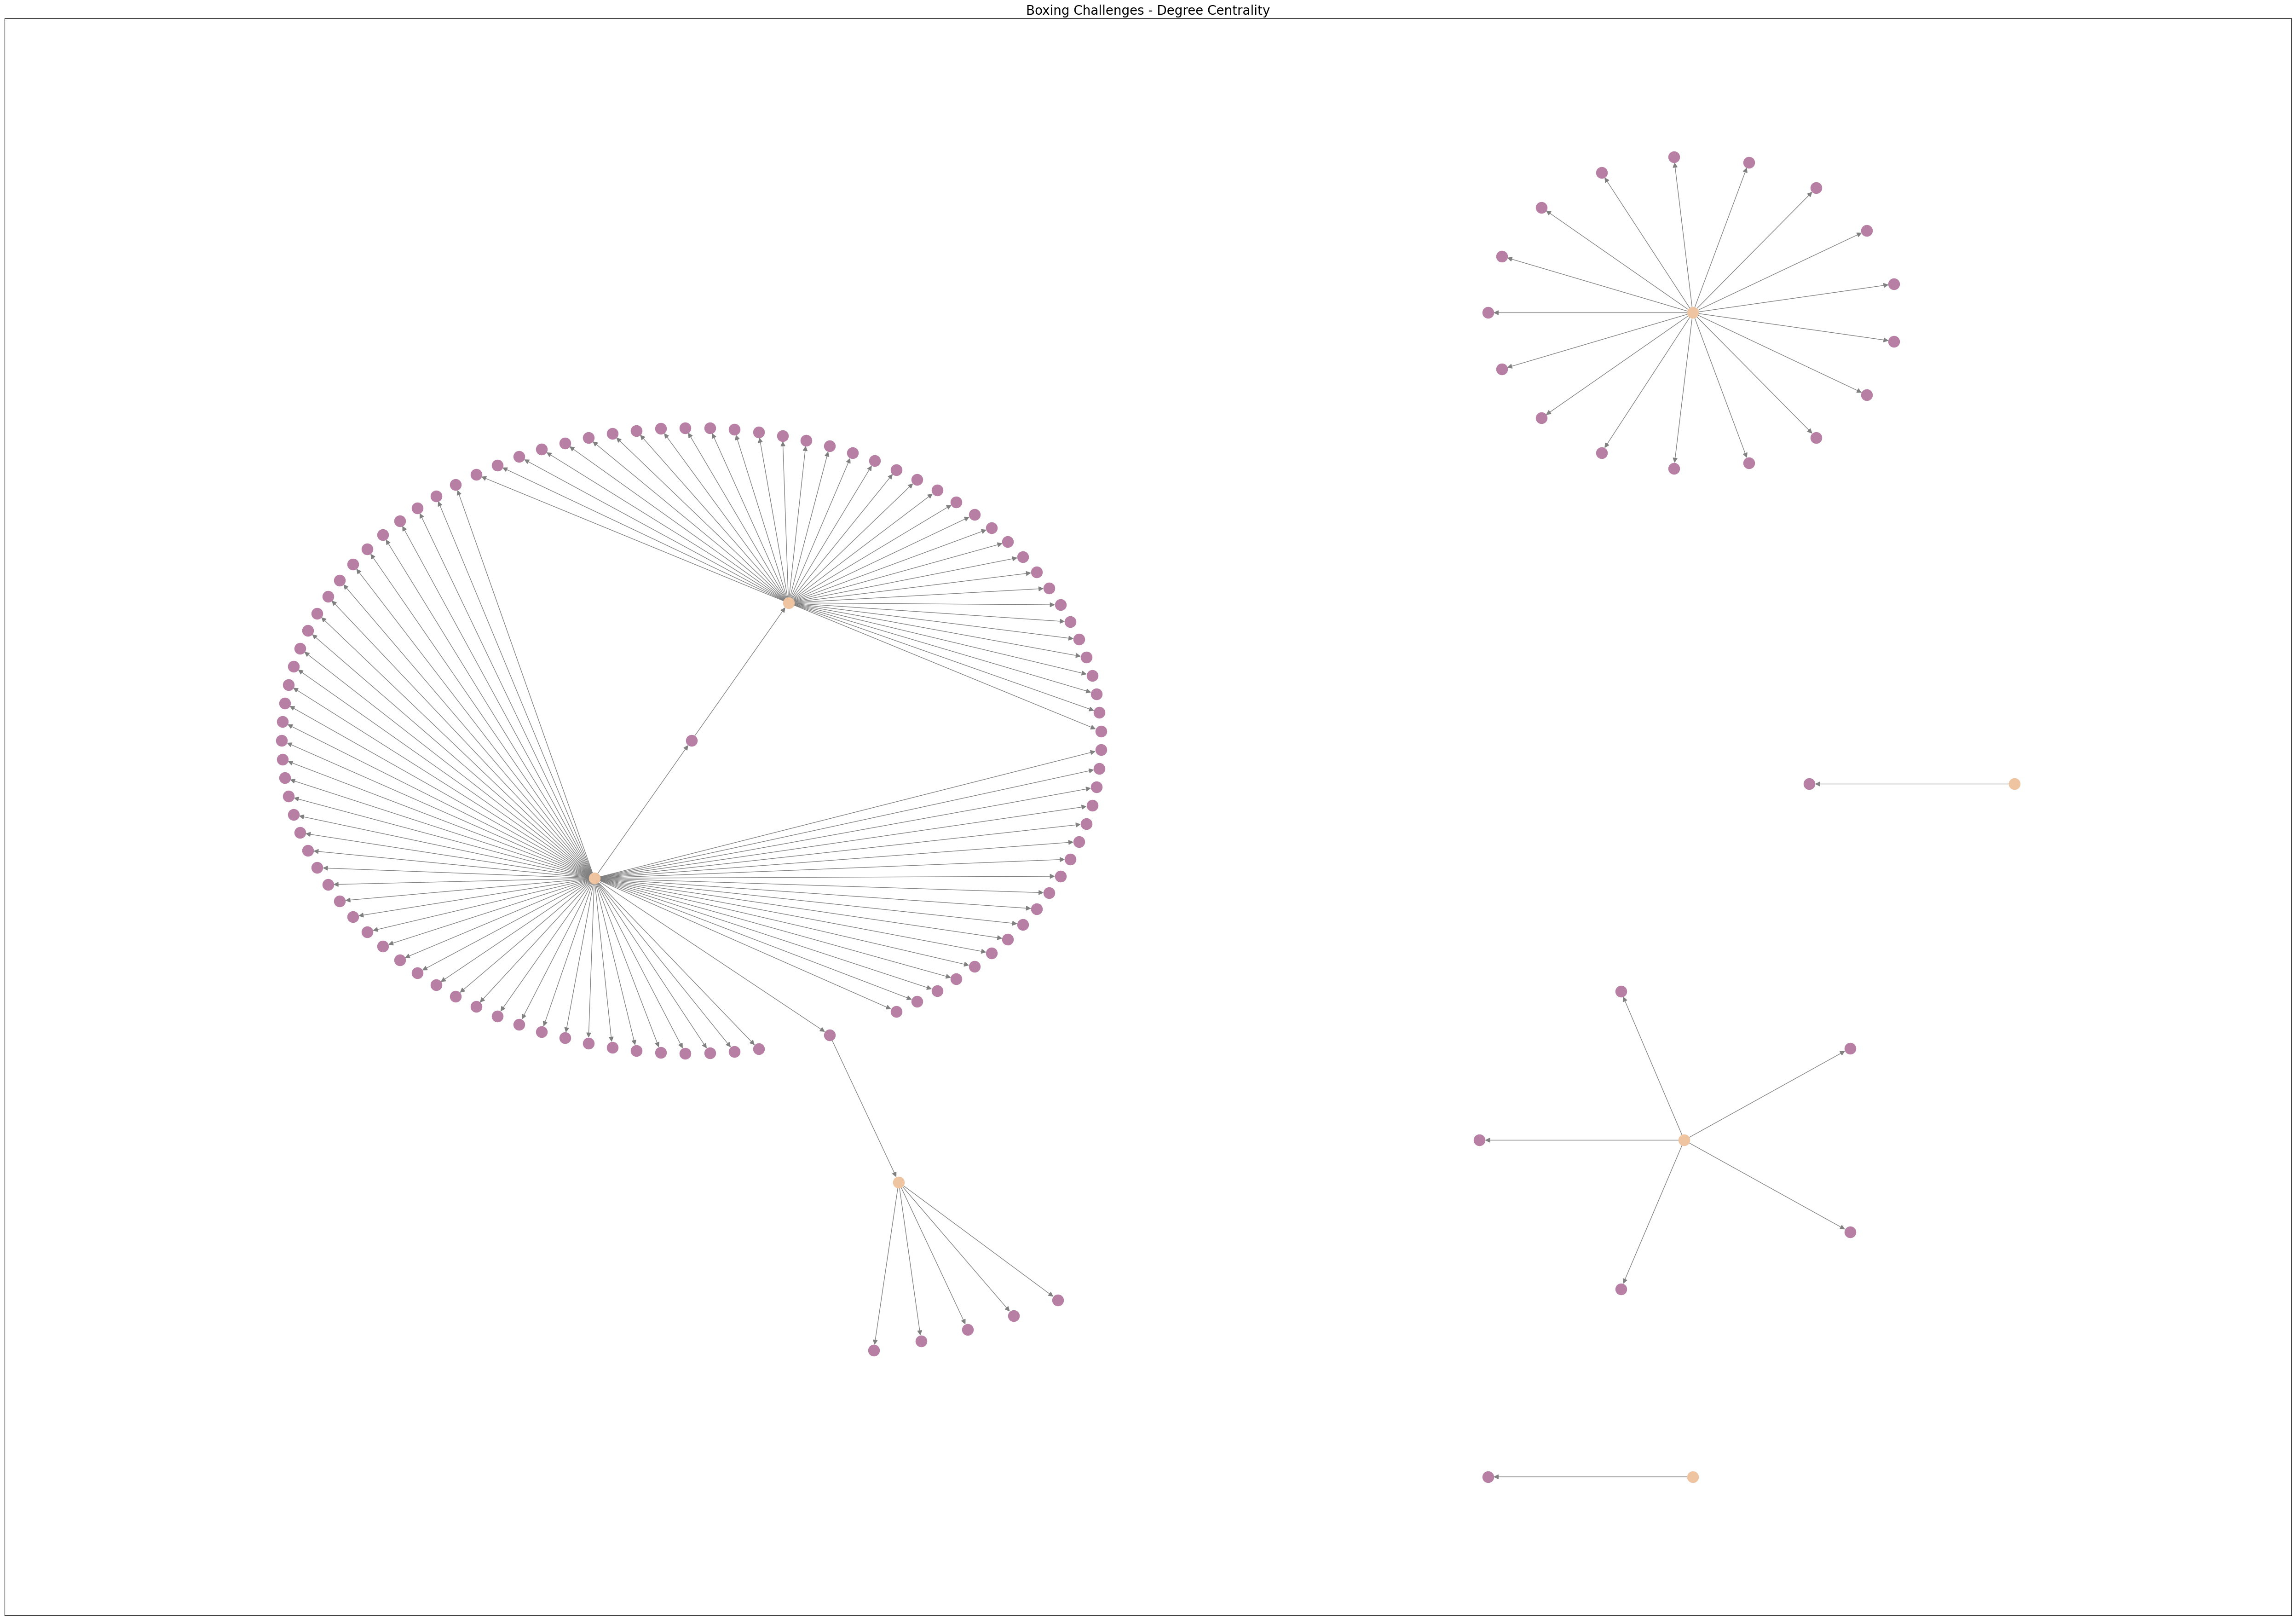

In [132]:
fig, ax = plt.subplots(figsize=(50, 35), dpi=100)
# Create a layout for our nodes 
nx.draw_networkx_edges(CCH, pos, edge_color='grey',arrows=True, arrowsize=16)
nx.draw_networkx_nodes(CCH, pos, nodelist=sources, node_color ='#EFC4A1')
nx.draw_networkx_nodes(CCH, pos, nodelist=challenger, node_color ='#B67FA3')
#challengers_dict = dict(zip(challengers, challengers))
#nx.draw_networkx_labels(CCH, pos, labels = node_labels, font_size=14)
#nx.draw_networkx_labels(CCH, pos, labels=challengers_dict, font_size=30)
#nx.draw_networkx_labels(CH, pos, labels=challenged_dict)
ax.margins(0.1, 0.05)
fig.tight_layout()
plt.axis("on")
plt.title('Boxing Challenges - Degree Centrality', fontsize=20)
#fig5 = plt.gcf()
#fig5.savefig("/Users/hernanadasme/Documents/data_challenges/graph.jpg", dpi=600) 
plt.show()

In [11]:
import nxviz.plots as nv
import nxviz as nv

/opt/anaconda3/lib/python3.9/site-packages/nxviz/__init__.py:18: UserWarning: 
nxviz has a new API! Version 0.7.3 onwards, the old class-based API is being
deprecated in favour of a new API focused on advancing a grammar of network
graphics. If your plotting code depends on the old API, please consider
pinning nxviz at version 0.7.3, as the new API will break your old code.

To check out the new API, please head over to the docs at
https://ericmjl.github.io/nxviz/ to learn more. We hope you enjoy using it!

(This deprecation message will go away in version 1.0.)

  warnings.warn(


In [12]:
from nxviz import CircosPlot
from nxviz import annotate

In [13]:
D = nx.Graph()
D.add_nodes_from(df_cl['challenging_id'], bipartite = 'challenger')
D.add_nodes_from(df_cl['challenged_id'], bipartite = 'challenged')
for r, d in df_cl.iterrows():
    D.add_edge(d['challenging_id'], d['challenged_id'], date = d['source_year'], name = d['rec_Title'])
#To be most informative and communicative, a graph visualization should first prioritize node placement 
#in a fashion that makes sense.


/opt/anaconda3/lib/python3.9/site-packages/nxviz/api.py:275: UserWarning: As of nxviz 0.7, the object-oriented API is being deprecated in favour of a functional API. Please consider switching your plotting code! The object-oriented API wrappers remains in place to help you transition over. A few changes between the old and new API exist; please consult the nxviz documentation for more information. When the 1.0 release of nxviz happens, the object-oriented API will be dropped entirely.
  warnings.warn(


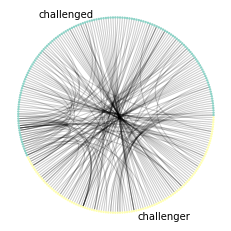

In [14]:
# 2. Create a layout for our nodes 
c = CircosPlot(D, node_grouping = 'bipartite', node_color = 'bipartite')
annotate.circos_group(D, group_by="bipartite")
plt.show()
#fig2 = plt.gcf()
#fig2.savefig("/Users/hernanadasme/Documents/data_challenges/graph_presentation_04.jpg", dpi=600)

In [17]:
from random import choice


G = nx.barbell_graph(m1=10, m2=3)
for n, d in G.nodes(data=True):
    G.nodes[n]["class"] = choice(["one", "two", "three"])
c = CircosPlot(G, node_color="class", node_order="class", node_labels=True)
c.draw()
plt.show()

KeyError: 'node_labels'

In [135]:
E = nx.DiGraph()
E.add_nodes_from(df_cl['challenging_id'], bipartite = 'challenger')
E.add_nodes_from(df_cl['challenged_id'], bipartite = 'challenged')
for r, d in df_cl.iterrows():
    E.add_edge(d['challenging_id'], d['challenged_id'], date = d['source_year'], name = d['rec_Title'])
#To be most informative and communicative, a graph visualization should first prioritize node placement 
#in a fashion that makes sense.

In [137]:
# 2. The metrics: size according to the degree centrality
#E.nodes()
E.degree(882)

2

NameError: name 'degree_centrality' is not defined